In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('labeled_data/final_traj.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
# split into training and test
train, test = train_test_split(df, test_size=0.2)

## K-Nearest Neighbors

In [ ]:
# train with KNN using TransportMode as target
X_train = train.drop('TransportMode', axis=1)
y_train = train['TransportMode']

# get first 50k rows
# X_train = X_train.head(50000)
# y_train = y_train.head(50000)

knn_gscv = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': range(1, 20)}, cv=5, n_jobs=-1)
knn_gscv.fit(X_train, y_train)


Best number neighbors: 19


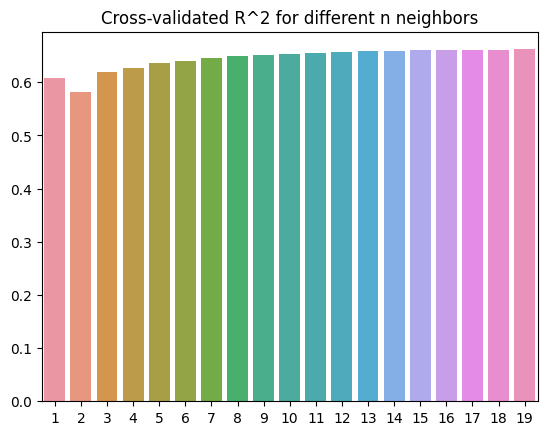

In [6]:
scores = knn_gscv.cv_results_['mean_test_score']
sns.barplot(x=list(range(1, 20)), y=scores).set_title('Cross-validated R^2 for different n neighbors')
print(f'Best number neighbors: {np.argmax(scores) + 1}')

In [7]:
model = KNeighborsClassifier(n_neighbors=19)
model.fit(X_train, y_train)
print(f'Training score: {model.score(X_train, y_train)}')

Training score: 0.6873604350781781


In [8]:
X_test = test.drop('TransportMode', axis=1)
y_test = test['TransportMode']
print(f'Test score: {model.score(X_test, y_test)}')

Test score: 0.6620490419588939


Hypothesis: Since most of the data points are short timeframe (a few seconds), the model may have trouble predicting longer timeframes

In [9]:
long_duration = df[df["Duration(s)"] > 5]
X_long_duration = long_duration.drop('TransportMode', axis=1)
y_long_duration = long_duration['TransportMode']
print(f'Long duration score: {model.score(X_long_duration, y_long_duration)}')

Long duration score: 0.7301332108406063


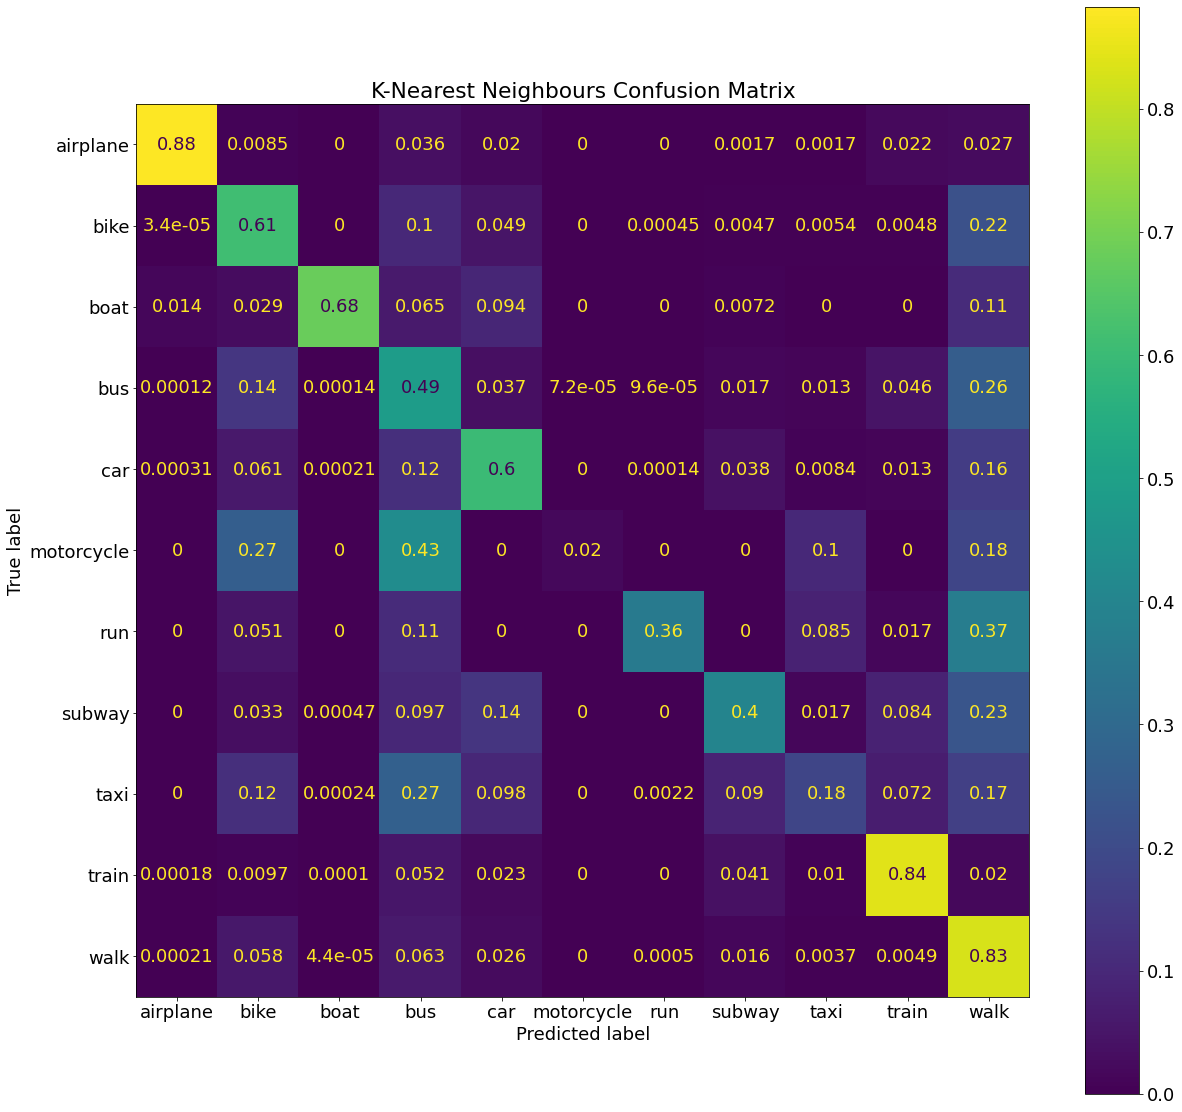

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize=(20, 20), facecolor='white')
plot_confusion_matrix(model, X_test, y_test, ax=ax, normalize='true')
plt.margins(x=0, y=0)
plt.title('K-Nearest Neighbours Confusion Matrix')
plt.savefig('./img/knn_confusion_matrix.png', bbox_inches='tight')

## Random Forest

In [10]:
randforest_gscv = GridSearchCV(RandomForestClassifier(), {'n_estimators': range(1, 20), 'max_depth': range(3, 8, 2)}, cv=5, n_jobs=-1)
randforest_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(3, 8, 2),
                         'n_estimators': range(1, 20)})

Best parameters: {'max_depth': 7, 'n_estimators': 19}


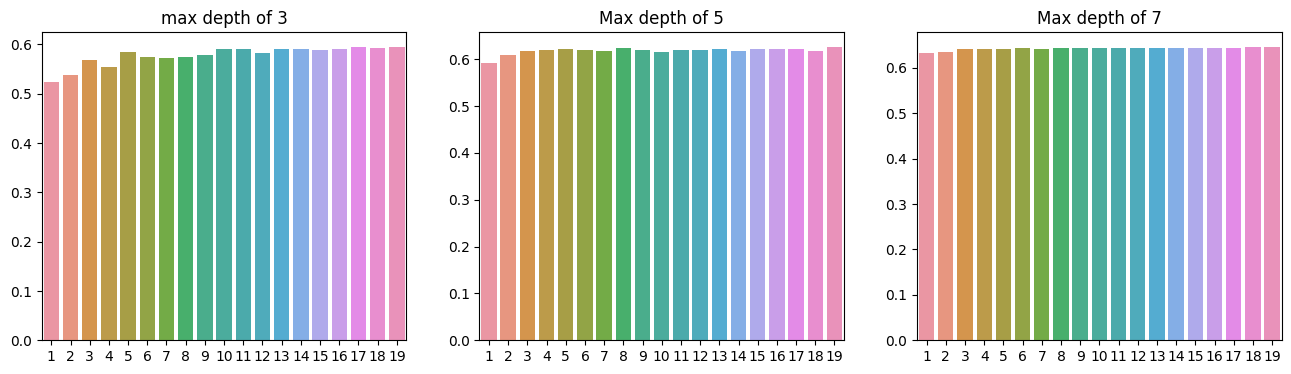

In [11]:
randforest_gscv.cv_results_['params'][:19]
# for depth of 3
depth_3 = randforest_gscv.cv_results_['mean_test_score'][:19]
depth_5 = randforest_gscv.cv_results_['mean_test_score'][19:38]
depth_7 = randforest_gscv.cv_results_['mean_test_score'][38:]

# plot each depth as a subplot
fig = plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
sns.barplot(x=list(range(1, 20)), y=depth_3).set_title('max depth of 3')
plt.subplot(1, 3, 2)
sns.barplot(x=list(range(1, 20)), y=depth_5).set_title('Max depth of 5')
plt.subplot(1, 3, 3)
sns.barplot(x=list(range(1, 20)), y=depth_7).set_title('Max depth of 7')

print(f'Best parameters: {randforest_gscv.best_params_}')

In [16]:
rand_forest = RandomForestClassifier(n_estimators=19, max_depth=7)
rand_forest.fit(X_train, y_train)
print(f'Training score: {rand_forest.score(X_train, y_train)}')

Training score: 0.6458572399728076


In [17]:
print(f'Test score: {rand_forest.score(X_test, y_test)}')

Test score: 0.6452158855571605


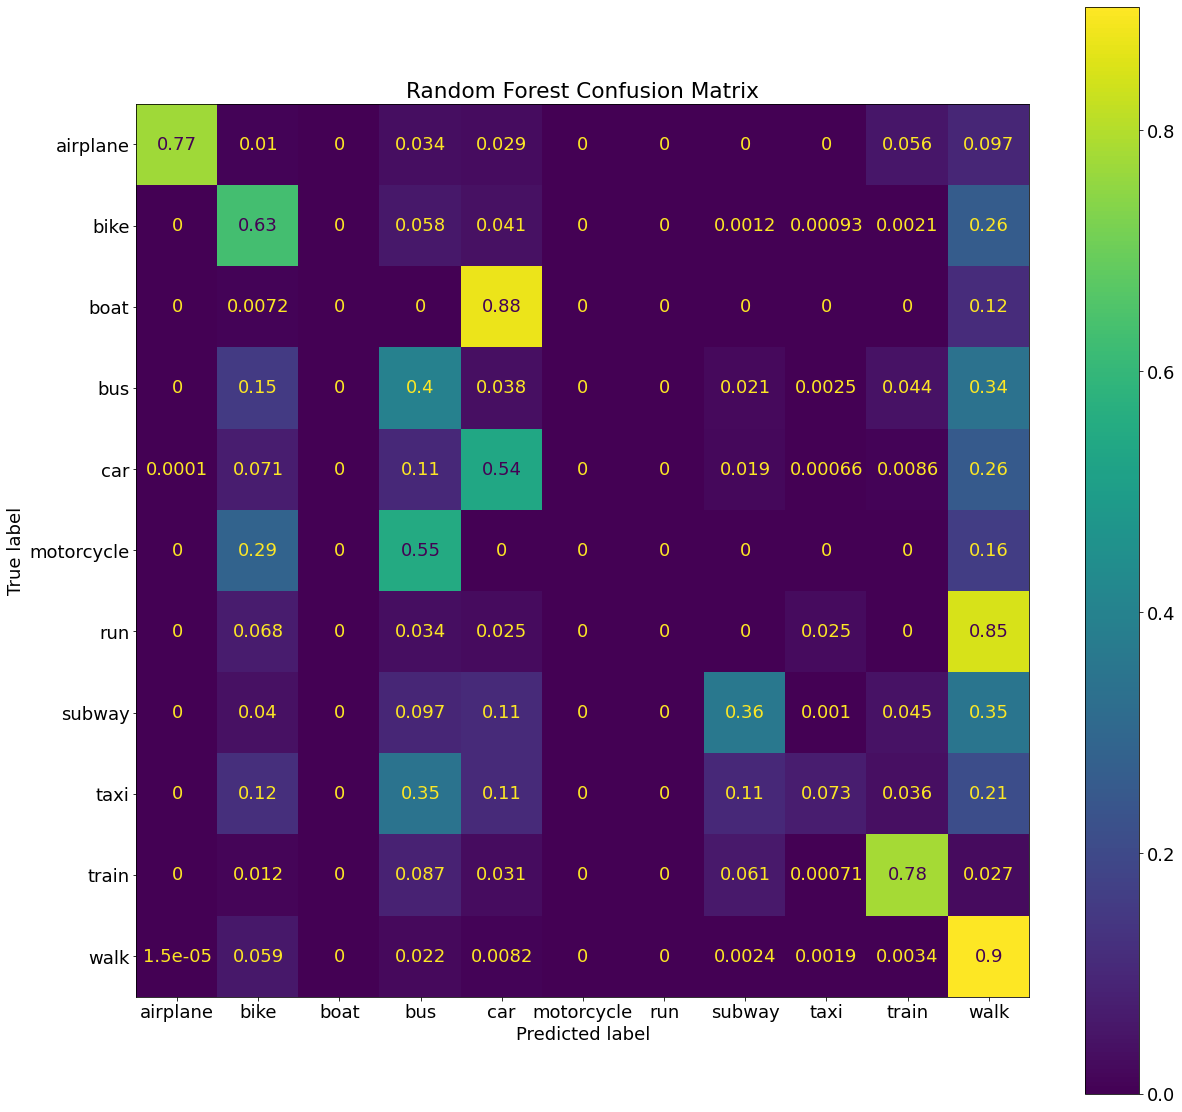

In [30]:
fig, ax = plt.subplots(figsize=(20, 20), facecolor='white')
plot_confusion_matrix(rand_forest, X_test, y_test, ax=ax, normalize='true')
plt.margins(x=0, y=0)
plt.title("Random Forest Confusion Matrix")
plt.savefig('./img/random_forest_confusion_matrix.png', bbox_inches='tight')